In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Import data

In [3]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
links = pd.read_csv('data/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
movies = pd.read_csv('data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
tags = pd.read_csv('data/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## EDA

In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [10]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [11]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [12]:
links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [13]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [14]:
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


<function matplotlib.pyplot.show(close=None, block=None)>

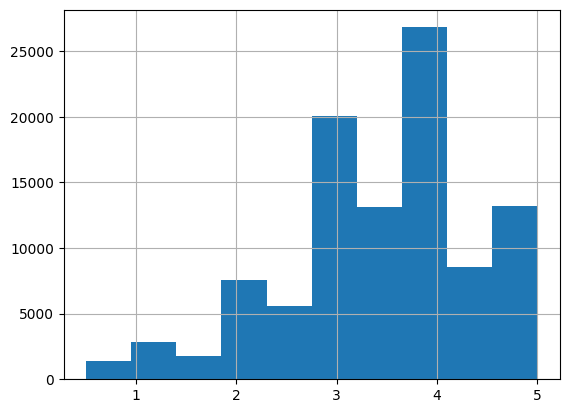

In [15]:
ratings['rating'].hist()
plt.show

### Cuales fueron los generos mejor rankeados de 2005?

In [16]:
# Convertir timestamp
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit="s")
ratings["year"] = ratings["timestamp"].dt.year
ratings.head()

,userId,movieId,rating,timestamp,year
0,1,1,4.0,2000-07-30 18:45:03,2000
1,1,3,4.0,2000-07-30 18:20:47,2000
2,1,6,4.0,2000-07-30 18:37:04,2000
3,1,47,5.0,2000-07-30 19:03:35,2000
4,1,50,5.0,2000-07-30 18:48:51,2000


In [17]:
ratings_2005 = ratings[ratings["year"] == 2005]

In [18]:
df = ratings_2005.merge(movies, on="movieId")

In [19]:
df = df.assign(genre=df["genres"].str.split("|")).explode("genre")

In [20]:
genre_avg = df.groupby("genre")["rating"].mean().sort_values(ascending=False)

In [21]:
genre_avg

genre
Film-Noir      3.954023
Documentary    3.718447
War            3.646154
Crime          3.625000
Drama          3.593750
Mystery        3.582803
IMAX           3.577320
Animation      3.531818
Thriller       3.514417
Western        3.470588
Romance        3.435289
Fantasy        3.410628
Action         3.405012
Sci-Fi         3.401163
Adventure      3.395765
Musical        3.389401
Horror         3.273092
Comedy         3.251329
Children       3.122328
Name: rating, dtype: float64

### Cual es el genero con mas reviews?

In [22]:
genre_stats = df.groupby("genre").agg(
    avg_rating=("rating", "mean"),
    num_reviews=("rating", "count")
).sort_values("num_reviews", ascending=False)

In [23]:
genre_stats

,avg_rating,num_reviews
genre,,
Drama,3.593750,2496
Comedy,3.251329,2258
Action,3.405012,1716
Thriller,3.514417,1526
Adventure,3.395765,1228
Romance,3.435289,1074
Crime,3.625000,988
Sci-Fi,3.401163,946
Fantasy,3.410628,621


### Top 5 peliculas de rankeadas en promedio

In [ ]:
movie_stats = df.groupby(["movieId", "title"]).agg(
    avg_rating=("rating", "mean"),
    num_reviews=("rating", "count")
).reset_index()

In [ ]:
movie_stats = movie_stats[movie_stats["num_reviews"] >= 50]

# Ordenar por promedio de rating
top5 = movie_stats.sort_values("avg_rating", ascending=False).head(5)
top5

,movieId,title,avg_rating,num_reviews
2218,8961,"Incredibles, The (2004)",4.107143,70
1523,4886,"Monsters, Inc. (2001)",4.090909,55
1078,3114,Toy Story 2 (1999),3.850000,50
1398,4306,Shrek (2001),3.722222,54
1023,2987,Who Framed Roger Rabbit? (1988),3.388889,63
